# Pandas（パンダス）とは

Pandasは、Pythonのデータ分析用のライブラリです。
Excelやcsvファイルの読み書き、データ集計・分析・加工、グラフ化などができます。


# オープンデータ

オープンデータとは、公共機関が調査した誰でも使える公表データです。

厚生省・新型コロナウイルス感染症について  
https://www.mhlw.go.jp/stf/covid-19/open-data.html

新規陽性者数の推移（日別）オープンデータ（CSV形式）  
https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv

死亡者数（累積）  
https://covid19.mhlw.go.jp/public/opendata/deaths_cumulative_daily.csv

In [ ]:
import pandas as pd
import numpy as np

# 表示する最大カラム数を制限無しにする。(デフォルトは20)
pd.set_option('display.max_columns', None)
# 新規陽性者数csvを読み込み
df1 = pd.read_csv('https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv', parse_dates=["Date"])
# df1['Date'] = pd.to_datetime(df1['Date']) # Date のタイプを日付形式に変換する
df1  # dfを表示する

In [ ]:
# 要約統計量を見る（各列ごとの平均、標準偏差、最大値、最小値、最頻値など）
df1.describe()

In [ ]:
# Date が 2022/1/1より大きいものだけ抜き出し、df2にコピーする
df2 = df1[df1["Date"] > np.datetime64("2022-01-01")].copy()
# Date をインデックスにする
df2.set_index(["Date"],inplace=True)
df2.describe()

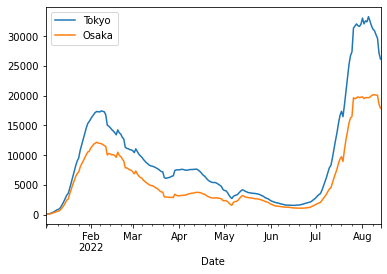

In [ ]:
# 東京、大阪だけ抜き出して、新規陽性者数7日間移動平均グラフにする
df2[['Tokyo','Osaka']].rolling(window='7d').mean().plot()

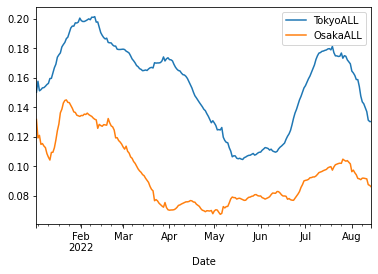

In [7]:
# 割合を計算する
df2['TokyoALL'] = df2['Tokyo'] / df2['ALL']  # Tokyo が ALL に占める割合を全行一発で計算し「TokyoALL」列に格納する
df2['OsakaALL'] = df2['Osaka'] / df2['ALL']  # Osaka が ALL に占める割合を全行一発で計算し「OsakaALL」列に格納する
# 新規陽性者数の東京、大阪の全国比率の7日間移動平均グラフ
df2[['TokyoALL','OsakaALL']].rolling(window='7d').mean().plot()

In [ ]:
# 死亡者数（累積）csvを読み込み
df3 = pd.read_csv('https://covid19.mhlw.go.jp/public/opendata/deaths_cumulative_daily.csv')
# Date のタイプを日付形式に変換する
df3['Date'] = pd.to_datetime(df3['Date'])
# Date が 2022/1/1より大きいものだけ抜き出し、df4にコピーする
df4 = df3[df3["Date"] > np.datetime64("2022-01-01")].copy()
# Date をインデックスにする
df4.set_index(["Date"],inplace=True)
# 累積データを日別データに変換する
df5 = df4.diff()
df5

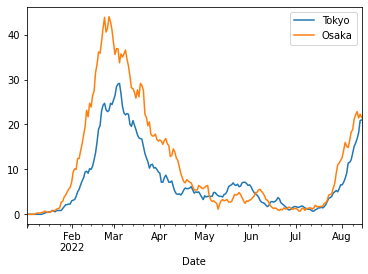

In [18]:
# 東京、大阪の、死亡者数7日間移動平均グラフ
df5[['Tokyo','Osaka']].rolling(window='7d').mean().plot()

# GoogleドライブのマウントとExcelファイルの読み書き

In [ ]:
# Googleドライブをマウント（プログラムからGoogleドライブを使えるようにする）
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Excelファイルを書き出す
df2.to_excel('/content/drive/MyDrive/pythonテスト.xlsx')


In [ ]:
# Excelファイルを読み込む
df6 = pd.read_excel('/content/drive/MyDrive/pythonテスト.xlsx')
df6